# Human Activity Recognition with Smartphones

We will be working on the Human Activity Recognition with Smartphones database, it has been built using the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.


The dataset consists of :

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
* Triaxial Angular velocity from the gyroscope.
* 561-feature vector with time and frequency domain variables.
* Activity label.

In [15]:
# import libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("smartphone-data.csv",delimiter = ",")

In [3]:
# check dataset's datatypes
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

All of the columns in the dataset is float (numerical) type except the target column `Activity`, we can visualize down bwlow.

In [4]:
df.tail(5).dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

`Check whether all the columns are scaled - mininimum value : -1 and maximum value : 1 `

In [5]:
print(df.iloc[:,:-1].min().value_counts())
print(df.iloc[:,:-1].max().value_counts())

-1.0    561
dtype: int64
1.0    561
dtype: int64


Yes all the columns are scaled.

`Now we have to check is our target column is balanced for each class`

In [6]:
df.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

The classes seems pretty much balanced.

Since the __activity columns is object type__, and our logistic regression would not be able to apprehend it. Therefor we must need to convert this column into numerical for each class, we can use __LabelEncoder__ to do do our job.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)

1859    3
5511    2
1783    2
4932    1
1746    5
Name: Activity, dtype: int32

In [8]:
# check for correalation between different variables

feature_columns = df.columns[:-1]
corr_values = df[feature_columns].corr()

In [9]:
#remove values bwlow the diagonal
trill_index = np.tril_indices_from(corr_values)

In [10]:
# change unused columns to NaN
for coor in zip(*trill_index):
    corr_values.iloc[coor[0],coor[1]] = np.NaN

In [11]:
# stack the data into dataframe
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'Feature 1',
                                'level_1':'Feature 2',
                                0:'correlation'}))

In [12]:
# since the correalation values are in the range of -1 t0 1. Therefor we add another column for absolute values for the corr.
corr_values['abs_correlation'] = corr_values['correlation'].abs()

In [18]:
corr_values

,Feature 1,Feature 2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


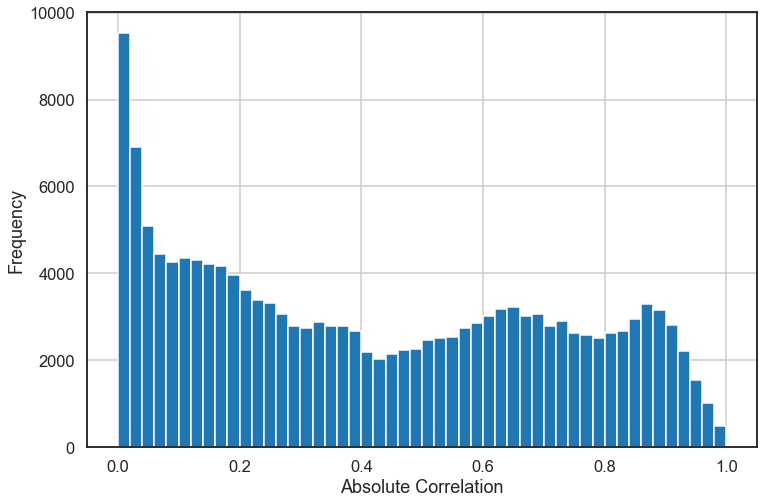

In [17]:
# plot the histogram or frequency count for each unique correaltion
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [19]:
# the features that are highly correlated
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,Feature 1,Feature 2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


These columns have very high correaltion which means that one column can be used instead of the other. For eg area and volume of a object will have high correlation with each other since they are both interelated.

Now we __split the data into train and test data sets__. Since we need each class eqaully divided into the trian and test dataset, we consider using __Scikit-learn's StratifiedShuffleSplit__ to maintain the same ratio of predictor classes, since it is like K Fold which can balance the classes.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

# get split indices
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_split.split(df[feature_columns], df.Activity))

# create dataframes
X_train = df.loc[train_idx, feature_columns]
y_train = df.loc[train_idx, "Activity"]

X_test = df.loc[test_idx, feature_columns]
y_test = df.loc[test_idx, "Activity"]

In [21]:
# check value count for y train
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [22]:
# check value count for y test
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

##  Logistic Regression

Now we begin our logistic regression to predict our classes. Since we could be overfitting our model we can use both l1 and l2 norms (regularization - lasso, ridge) to check the accuracy for our model. Therefor we'll be using three types of model here
first the vanilla logistic regression without any hyperparameter tuning, secondly with l1 and third with l2 regularization.

In [23]:
from sklearn.linear_model import LogisticRegression

# since there are multiple classes, we have to use one vs all classifier -- solver = liblinear
lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

# l1 norm regularisation with lamda selection =10 , cv = 4
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train,y_train)

In [26]:
# l1 norm regularisation with lamda selection =10 , cv = 4
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train,y_train)

In [28]:
# combine all coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for label,model in zip(coeff_labels, coeff_models):
    coeffs = model.coef_
    coeff_label = pd.MultiIndex(levels=[[label], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

In [30]:
# check 10 random sample
coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
35   0.120025  0.521152 -0.471850  0.031755 -0.183172  0.303932  0.017035   
401 -0.007959  0.221205  0.127256  0.499889  0.162896 -0.169742 -0.051321   
494  0.003497  0.191808  0.276696  0.148658  0.182418 -0.089770  0.000000   
507  0.019842 -0.053250 -0.322731 -1.004550  0.877976 -0.633997  0.000000   
285 -0.048881 -0.247449 -0.195492  0.150134  0.022948  0.350915  0.000000   
7   -0.044016 -0.005860 -0.435470  0.246586 -0.433986 -0.090402  0.000000   
478  0.003130  0.239679  0.275174  0.160749  0.186584  0.378035  0.000000   
489 -0.008522  0.192153  0.282132 -0.294092  0.946852 -0.466729 -0.107413   
329 -0.012531  0.173405  0.121301  0.087804 -0.201136  0.019096 -0.079854   
255 -0.008875 -0.031974  0.291597 -0.093514  0.174068 -0.343126  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
35   0.000000  0.000000  0.000000  0.000000  0.144820  0.188081  0.793139   
401  0.306057  0.000000  0.608517  0.105367  0.006905 -0.033540  0.823239   
494  0.000000  0.570174  0.000000  0.094683  0.000000 -0.012959  0.386930   
507  0.000000 -0.543540 -2.334196  2.755864 -2.969707  0.051006  0.504098   
285  0.000000  0.000000  0.000000 -0.154139  1.160128 -0.078401 -1.186338   
7    0.000000 -1.166802  0.509051 -0.172674 -0.862215 -0.032279  0.803883   
478  0.324832  0.537121  0.000929  0.000000  0.292108 -0.016685  0.659351   
489  0.000000  0.387629 -0.024405  1.042000 -0.634407 -0.034728  0.336916   
329  0.000000  0.000000  0.048909 -0.004057  0.000000 -0.039497  0.705035   
255  0.000000  0.000000 -0.036641  0.057327 -0.529564 -0.023212 -0.062761   

                                             
            2         3         4         5  
35  -0.718740  0.300423 -0.514245  1.246318  
401  0.137776  1.609848  0.374122 -0.999485  
494  0.368818  0.140079  0.495039 -0.905059  
507 -0.522496 -2.470319  1.625712 -2.714562  
285 -0.182785  0.183821 -0.171914  2.439051  
7   -0.660761  0.771184 -0.611159 -0.666417  
478  0.344328  0.468246  0.321757  1.386351  
489  0.417692 -1.000198  2.237415 -1.817352  
329  0.134686  0.067879 -0.487264  0.371311  
255  0.386936 -0.236754  0.435337 -2.357204

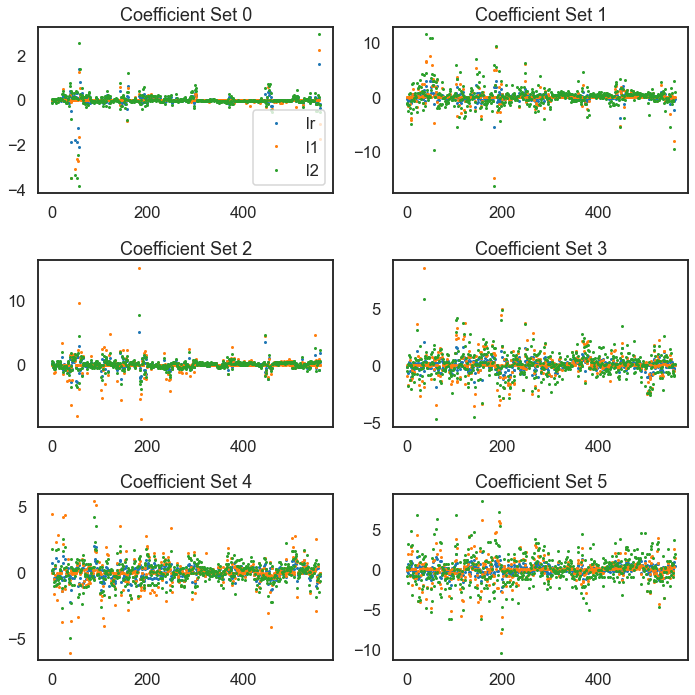

In [31]:
# plot six separate plots for each of the multi-class coefficients.
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [32]:
# Predict and store classes for each model. Store the probablity and class for each model

y_pred = list()
y_prob = list()

for label,model in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(model.predict(X_test), name=label))
    y_prob.append(pd.Series(model.predict_proba(X_test).max(axis=1), name=label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [33]:
# check predicted y 
y_pred.head(10)

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
5,5,5,5
6,0,0,0
7,2,2,2
8,0,0,0
9,0,0,0


In [34]:
# check probablity y 
y_prob.head(10)

,lr,l1,l2
0,0.998939,0.998928,0.999758
1,0.988165,0.999685,0.999477
2,0.987592,0.995513,0.999696
3,0.981381,0.999150,0.994338
4,0.998277,0.999922,0.999997
5,0.981715,0.998655,0.998196
6,0.998815,0.999998,1.000000
7,0.996950,0.999764,0.999990
8,0.999703,1.000000,0.999995
9,0.997391,0.999984,1.000000
